# Actividad Práctica 2
# Técnicas de aprendizaje profundo
# Parte 2: Redes neuronales recurrentes

<div class="alert alert-info">

</div>


## Explorar los datos

In [29]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [11]:
path_assets = os.path.abspath(os.path.join(os.getcwd(),'..'))
df = pd.read_csv(os.path.join(path_assets, os.path.normpath('assets/international-airline-passengers.csv')))
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [13]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


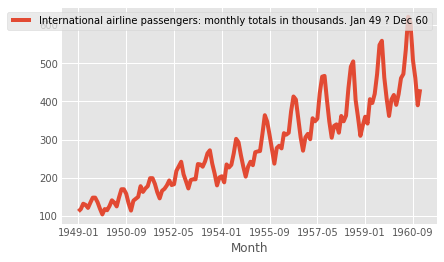

In [30]:
df.plot.line(x=df.columns[0], y=df.columns[1])

El gráfico muestra el total mensual de pasajeros en vuelos internacionales en EE.UU para el perı́odo Enero 1949 a Diciembre 1960. Las cifras están en miles de pasajeros por mes. 

La tendencia creciente de la curva muestra el aumento de pasajeros a lo largo de los años. Adicionalmente,
cada año presenta *peaks* característicos causados por aumentos puntuales de la demanda debido al perı́odo de
vacaciones y festividades especiales.

Se intentará predecir en el tiempo la cantidad de pasajeros, usando RNN.



## RNN

In [37]:
# Definicion de librerias con la funciones que seran utilizadas por Keras.
import keras
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers.recurrent import SimpleRNN
from keras.layers.convolutional import Convolution2D, ZeroPadding2D, Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D

In [32]:
# nueva instancia de red secuencial
modelRNN = Sequential()

In [46]:
# capa con una RNN
modelRNN.add(SimpleRNN(5, input_shape=(4,1), return_sequences=False))

Se reescribió la función debido a la sugerencia contenida en la nueva versión de la API de `keras`:

<div class="alert alert-danger">
/home/diego/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if __name__ == '__main__':
/home/diego/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(5, return_sequences=False, input_shape=(4, 1))`
  if __name__ == '__main__':
</div>

En este caso, se tiene que
*  `input_dim` es el equivalente a la dimensión de los datos de entrada. En este caso es la demanda mensual, la cual es de una dimensión.
*  `input_length` es el equivalente al largo de la secuencia de entrada. Para este caso, se consideran cuatro meses por lo que su valor es 4

![rnn1]('./img/rnn1.png')

In [49]:
modelRNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 5)                 35        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
